This is a hands-on tutorial for Lite Hardware-aware Neural Architecture Search with a grid-based selection.

In this notebook, we will demonstrate how to get search results using multi-objective optimization with a grid-based selection method. 

## import packages

In [1]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import backend as K

K.set_learning_phase(0)        

Using TensorFlow backend.


## build accuracy predictor

In [2]:
accuracy_predictor = load_model('./models/pred_acc_vgg.h5')
accuracy_predictor.summary()

2021-10-01 15:04:53.401095: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-01 15:04:53.427168: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3493380000 Hz
2021-10-01 15:04:53.429592: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x556f32470e80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-01 15:04:53.429635: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 396)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 800)               317600    
_________________________________________________________________
layer_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
output (Dense)               (None, 1)                 801       
Total params: 959,201
Trainable params: 959,201
Non-trainable params: 0
_________________________________________________________________


## build latency estimator for target hardware

In [3]:
"""Please choose your target hardware by uncommenting below command line depending on your target hardware
"""

# target hardware: FPGA 
latency_predictor = load_model('./models/pred_fpga_latency_vgg.h5')

# target hardware: AMD CPU
#latency_predictor = load_model('./models/pred_amd_latency_vgg.h5')

# target hardware: Intel CPU
#latency_predictor = load_model('./models/pred_intel_latency_vgg.h5')

latency_predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 396)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 800)               317600    
_________________________________________________________________
layer_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
output (Dense)               (None, 1)                 801       
Total params: 959,201
Trainable params: 959,201
Non-trainable params: 0
_________________________________________________________________


## Hyper-parameters for search process

In [4]:
""" Hyper-parameters for evolutionary search process
"""

mutate_prob = 0.1            
population_size = 100 
num_cycle = 10 
parent_ratio = 0.25
crossover_ratio = 0.5
constraint = None   # hardware constraint (latency) should be None

hparam = {'mutate_prob': mutate_prob,
          'population_size': population_size,
          'num_cycle': num_cycle,
          'parent_ratio': parent_ratio,
          'crossover_ratio': crossover_ratio,
          'constraint': constraint
          }



## evolution search

In [5]:
""" Please run the below commands on CPU
"""
from nas.search import search_multi
nas = search_multi(accuracy_predictor, latency_predictor, **hparam)

history = nas.evolution_search()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.40it/s]


## visualize the searching result

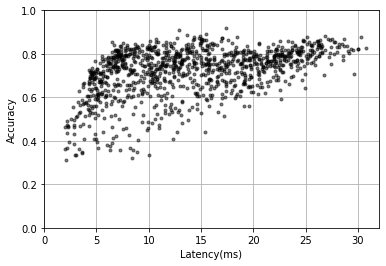

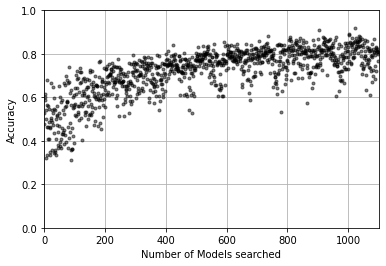

In [6]:
acc_list = []
latency_list = []
for h in history:
    acc_list.append(h[1])
    latency_list.append(h[2])


plt.figure()
plt.plot(latency_list,acc_list,'k.',alpha=0.5)
plt.xlabel('Latency(ms)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlim(0,int(max(latency_list)))
plt.grid()


       
#####################################
plt.figure()
plt.plot(range(len(acc_list)),acc_list,'k.',alpha=0.5)
plt.xlabel('Number of Models searched')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlim(0,len(history)+1)
plt.grid()
